In [1]:
#importing basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [3]:
#reading the dataset
data=pd.read_csv("E:/DataSet/Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
label_encoder = preprocessing.LabelEncoder()
data['Urban']= label_encoder.fit_transform(data['Urban'])
data['US']= label_encoder.fit_transform(data['US'])
data['ShelveLoc']= label_encoder.fit_transform(data['ShelveLoc'])
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


## EDA

(array([ 6., 16., 47., 83., 89., 79., 40., 29.,  8.,  3.]),
 array([ 0.   ,  1.627,  3.254,  4.881,  6.508,  8.135,  9.762, 11.389,
        13.016, 14.643, 16.27 ]),
 <BarContainer object of 10 artists>)

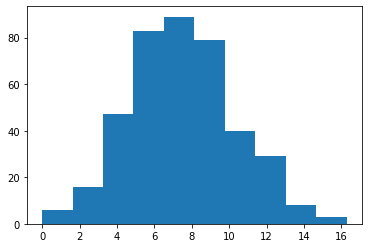

In [5]:
plt.hist(data.Sales)

{'whiskers': [<matplotlib.lines.Line2D at 0x241b70fb4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x241b712e880>,
 'boxes': [<matplotlib.lines.Line2D at 0x241b610dc10>],
 'medians': [<matplotlib.lines.Line2D at 0x241b711ec70>],
 'fliers': [<matplotlib.lines.Line2D at 0x241b7119700>],
 'means': []}

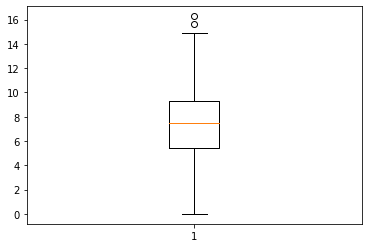

In [6]:
plt.boxplot(data.Sales)

In [13]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.847500,124.975000,68.657500,6.635000,264.840000,115.795000,1.307500,53.322500,13.900000,0.705000,0.645000
std,0.359955,15.334512,27.986037,6.650364,147.376436,23.676664,0.833475,16.200297,2.620528,0.456614,0.479113
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,0.000000,25.000000,10.000000,0.000000,0.000000
25%,1.000000,115.000000,42.750000,0.000000,139.000000,100.000000,1.000000,39.750000,12.000000,0.000000,0.000000
50%,1.000000,125.000000,69.000000,5.000000,272.000000,117.000000,2.000000,54.500000,14.000000,1.000000,1.000000
75%,1.000000,135.000000,91.000000,12.000000,398.500000,131.000000,2.000000,66.000000,16.000000,1.000000,1.000000
max,1.000000,175.000000,120.000000,29.000000,509.000000,191.000000,2.000000,80.000000,18.000000,1.000000,1.000000


#### Creating the logic for Decision Making

In [8]:
for i in range(len(data.Sales)):
    if data.Sales[i] < data.Sales.median():
        data.Sales[i] = 0
    else:
        data.Sales[i] = 1

<ipython-input-8-5ff6681687d3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Sales[i] = 1
<ipython-input-8-5ff6681687d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Sales[i] = 0


In [9]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1.0,138,73,11,276,120,0,42,17,1,1
1,1.0,111,48,16,260,83,1,65,10,1,1
2,1.0,113,35,10,269,80,2,59,12,1,1
3,0.0,117,100,4,466,97,2,55,14,1,1
4,0.0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1.0,138,108,17,203,128,1,33,14,1,1
396,1.0,139,23,3,37,120,2,55,11,0,1
397,1.0,162,26,12,368,159,2,40,18,1,1
398,1.0,100,79,7,284,95,0,50,12,1,1


In [14]:
x=data.iloc[:,1:]
y=data['Sales']

In [15]:
data.Sales.value_counts()

1.0    339
0.0     61
Name: Sales, dtype: int64

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)

### Creating the Random Forest using Entropy Criteria

In [17]:
def tree_best(x_train,y_train,x_test,y_test):
    tree_score={}
    for tree in range(1,30):
        model=RandomForestClassifier(n_estimators=tree,criterion='entropy')
        model.fit(x_train,y_train)
        tree_score[tree]=round(model.score(x_test,y_test)*100,2)
    max_score=max(tree_score.values())
    for key in tree_score.keys():
        if tree_score[key]==max_score:
            best_key=key
            print("The best num of trees is {} with score of {}".format(key,max_score))
            break
    model=RandomForestClassifier(n_estimators=best_key,criterion='entropy')
    model.fit(x_train,y_train)
    print("Accuracy ={}%".format(round(model.score(x_test,y_test)*100,2)))
    return model

In [18]:
model=tree_best(x_train,y_train,x_test,y_test)

The best num of trees is 22 with score of 87.5
Accuracy =83.75%


In [20]:
pred=model.predict(x_test)
pd.Series(pred).value_counts()

1.0    78
0.0     2
dtype: int64

In [21]:
pd.crosstab(y_test,pred)

col_0,0.0,1.0
Sales,,
0.0,0,11
1.0,2,67


In [22]:
print("Accuracy = {}%".format(round(np.mean(pred==y_test)*100,2)))

Accuracy = 83.75%


In [23]:
fn=list(x.columns)
imp_features1=pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False)
imp_features1

Price          0.197311
Age            0.150925
CompPrice      0.135271
Income         0.118212
Advertising    0.117798
Population     0.117296
Education      0.071281
ShelveLoc      0.052768
Urban          0.025526
US             0.013611
dtype: float64

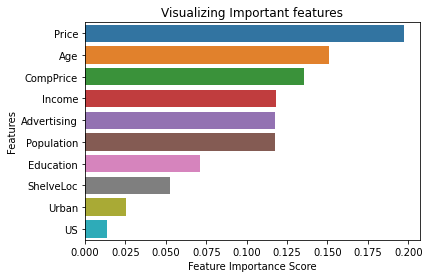

In [24]:
sns.barplot(x=imp_features1,y=imp_features1.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important features")
plt.show()

##### Hence we can see the important features for classification of sales as high or low as predicted by the C5.0 model

### Building the Random Forest Classifier using Gini Criteria

In [26]:
def best_tree(x_train,y_train,x_test,y_test):
    tree_score={}
    for tree in range(1,30):
        model=RandomForestClassifier(n_estimators=tree,criterion='gini')
        model.fit(x_train,y_train)
        tree_score[tree]=round(model.score(x_test,y_test)*100,2)
    max_score=max(tree_score.values())
    for key in tree_score.keys():
        if tree_score[key]==max_score:
            best_key=key
            print("The best num of trees is {} with score of {}".format(key,max_score))
            break
    model=RandomForestClassifier(n_estimators=best_key,criterion='gini')
    model.fit(x_train,y_train)
    print("Accuracy ={}%".format(round(model.score(x_test,y_test)*100,2)))
    return model

In [29]:
model_gini=best_tree(x_train,y_train,x_test,y_test)

The best num of trees is 25 with score of 88.75
Accuracy =86.25%


In [30]:
pred1=model_gini.predict(x_test)
pd.Series(pred1).value_counts()

1.0    78
0.0     2
dtype: int64

In [31]:
print("Accuracy ={}%".format(round(np.mean(pred1==y_test)*100,2)))

Accuracy =86.25%


In [32]:
imp_features2=pd.Series(model_gini.feature_importances_,index=fn).sort_values(ascending=False)
imp_features2

Age            0.170937
Price          0.153453
CompPrice      0.146386
Income         0.130596
Population     0.124417
Education      0.087816
Advertising    0.077887
ShelveLoc      0.066042
Urban          0.025247
US             0.017219
dtype: float64

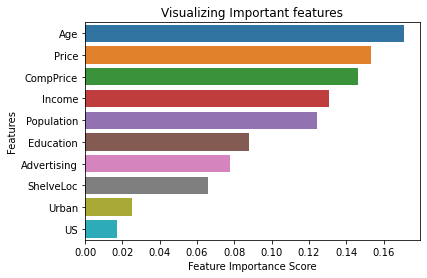

In [33]:
sns.barplot(x=imp_features2,y=imp_features2.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important features")
plt.show()

Here we can see the important features for classification of sales as high or low as predicted by the CART model

##### Hence we can conclude that in this case the forest created using CART decsion trees gives better accuracy than the one created with C5.0 trees and we can see the important features for classification as visualised